# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [121]:
# Melakukan import library

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from debugpy.launcher import channel
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import (LabelEncoder,
                                   MinMaxScaler, OneHotEncoder)
from sklearn.decomposition import PCA
from traitlets import Tuple
from yellowbrick.cluster import KElbowVisualizer

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [122]:
# Membaca dataset transasi bank dari lokal dan menampilkan data pada 5 baris pertama

bank_transactions_df = pd.read_csv("Dataset_inisiasi.csv")
bank_transactions_df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [123]:
# Menampilkan ringkasan informasi dari dataset
bank_transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [124]:
# Menampilkan statistik deskriptif dari dataset untuk semua kolom (numerik dan kategorial)
bank_transactions_df.describe(include="all")

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2512,2512,2512.000000,2512,2512,2512,2512,2512,2512,2512,2512.000000,2512,2512.000000,2512.000000,2512.000000,2512
unique,2512,495,NaN,2512,2,43,681,592,100,3,NaN,4,NaN,NaN,NaN,360
top,TX002512,AC00363,NaN,2023-02-14 16:21:23,Debit,Fort Worth,D000548,200.136.146.93,M026,Branch,NaN,Student,NaN,NaN,NaN,2024-11-04 08:09:17
freq,1,12,NaN,1,1944,70,9,13,45,868,NaN,657,NaN,NaN,NaN,16
mean,NaN,NaN,297.593778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.673965,NaN,119.643312,1.124602,5114.302966,NaN
std,NaN,NaN,291.946243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.792198,NaN,69.963757,0.602662,3900.942499,NaN
min,NaN,NaN,0.260000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,10.000000,1.000000,101.250000,NaN
25%,NaN,NaN,81.885000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,63.000000,1.000000,1504.370000,NaN
50%,NaN,NaN,211.140000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,112.500000,1.000000,4735.510000,NaN
75%,NaN,NaN,414.527500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.000000,NaN,161.000000,1.000000,7678.820000,NaN


In [125]:
# Mengecek jumlah nilai yang hilang di setiap kolom
missing_values = bank_transactions_df.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [126]:
# Melihat jumlah perangkat per IP Address
bank_transactions_df.groupby(by="IP Address")["DeviceID"].nunique().sort_values(ascending=False)

IP Address
200.136.146.93    13
49.31.186.82      11
147.119.62.178    10
166.79.195.157    10
9.230.41.239      10
                  ..
110.243.14.36      1
85.191.79.161      1
80.247.6.83        1
80.58.55.129       1
81.156.221.124     1
Name: DeviceID, Length: 592, dtype: int64

In [127]:
# Melihat jumlah transaksi per IP Address
bank_transactions_df.groupby(by="IP Address")["TransactionID"].nunique().sort_values(ascending=False)

IP Address
200.136.146.93    13
49.31.186.82      11
9.230.41.239      10
147.119.62.178    10
173.135.78.201    10
                  ..
92.90.132.79       1
80.247.6.83        1
80.58.55.129       1
81.156.221.124     1
102.203.223.1      1
Name: TransactionID, Length: 592, dtype: int64

In [128]:
# Melihat jumlah transaksi per akun
bank_transactions_df.groupby(by="AccountID")["TransactionID"].nunique().sort_values(ascending=False)

AccountID
AC00362    12
AC00363    12
AC00202    12
AC00460    12
AC00225    11
           ..
AC00476     1
AC00486     1
AC00104     1
AC00406     1
AC00008     1
Name: TransactionID, Length: 495, dtype: int64

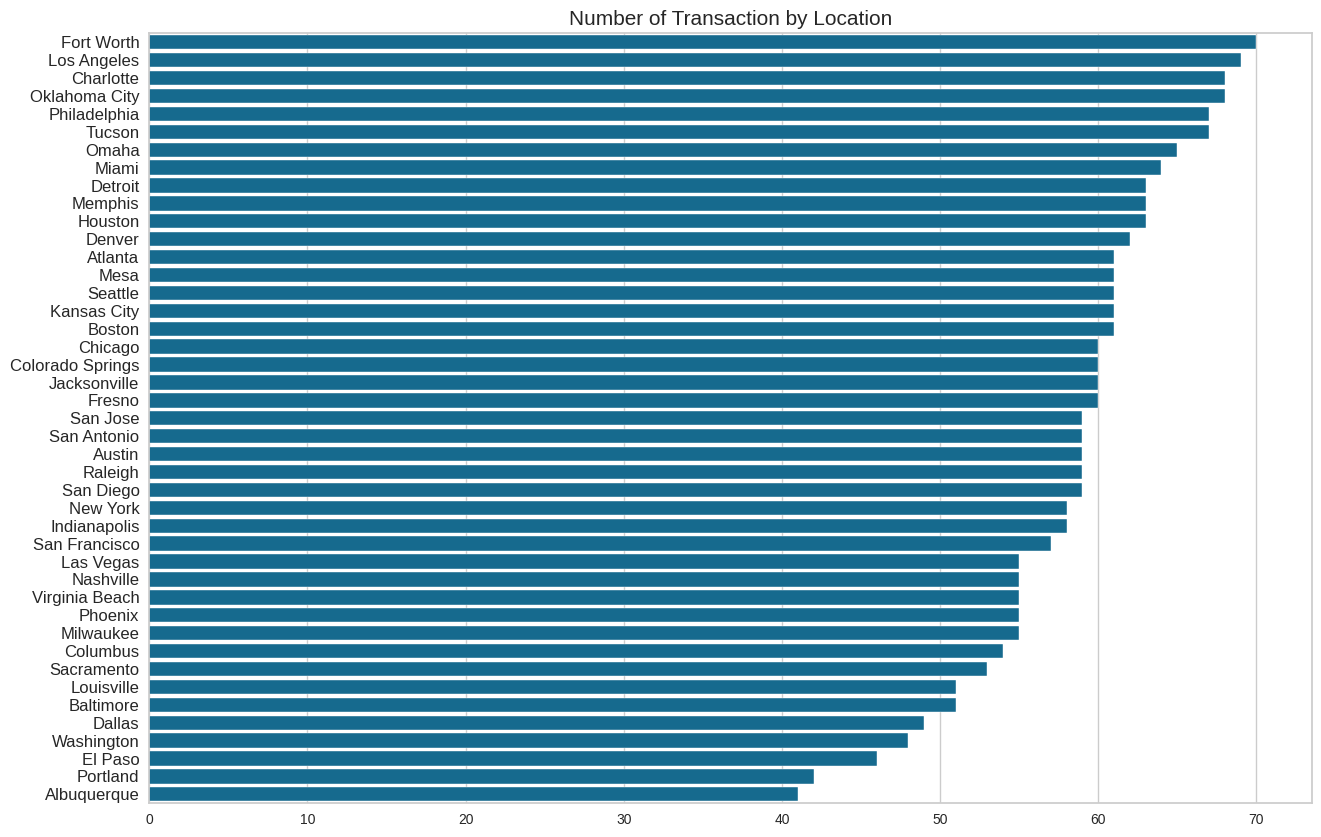

In [129]:
# Melihat demografi transaksi berdasarkan lokasi
bylocation_df = bank_transactions_df.groupby(by="Location")["TransactionID"].nunique().reset_index()

bylocation_df.rename(columns={
    "TransactionID": "TransactionCount"
}, inplace=True)

plt.figure(figsize=(15, 10))
sns.barplot(
    x="TransactionCount",
    y="Location",
    data=bylocation_df.sort_values(by="TransactionCount", ascending=False)
)

plt.title("Number of Transaction by Location", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

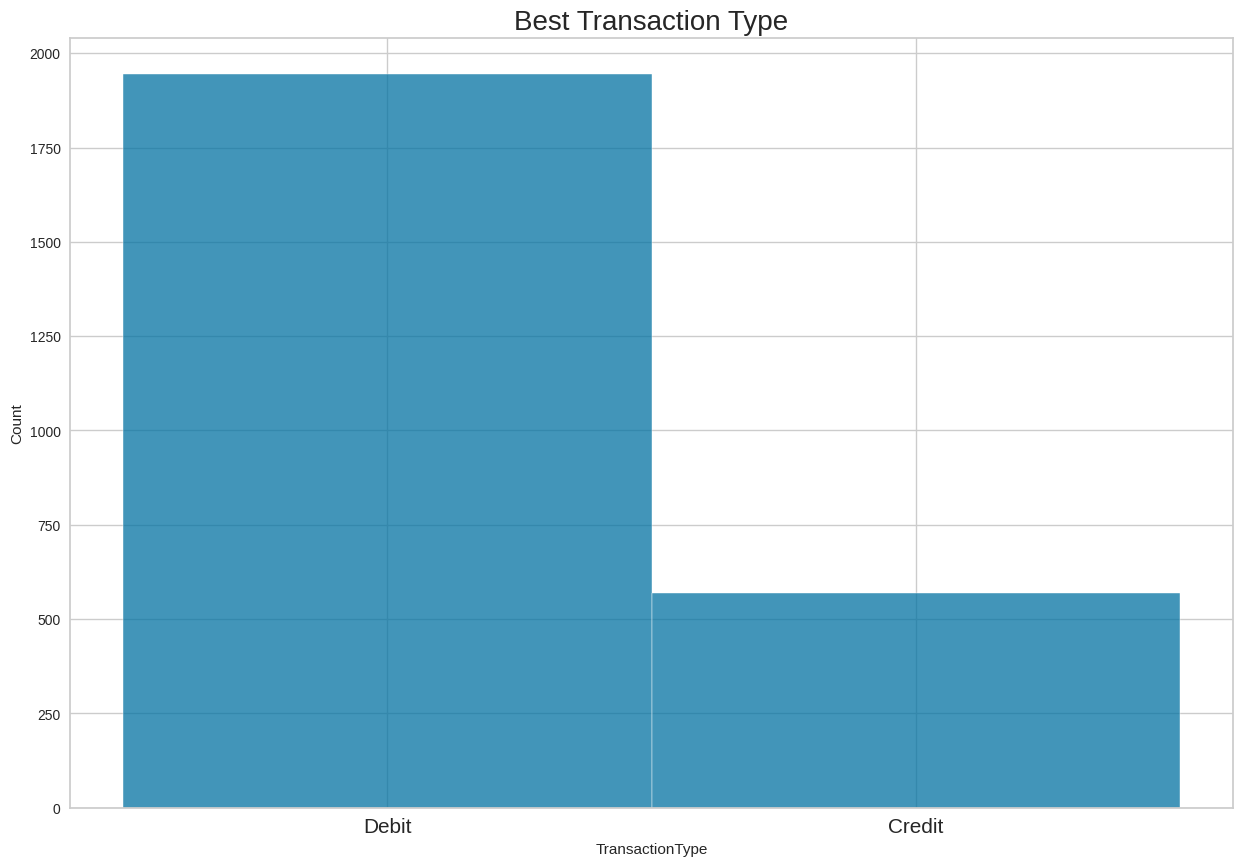

In [130]:
# Melihat jenis transaksi yang sering digunakan
plt.figure(figsize=(15, 10))
sns.histplot(x="TransactionType", data=bank_transactions_df)

plt.title("Best Transaction Type", fontsize=20)
plt.tick_params(axis="x", labelsize=15)
plt.show()

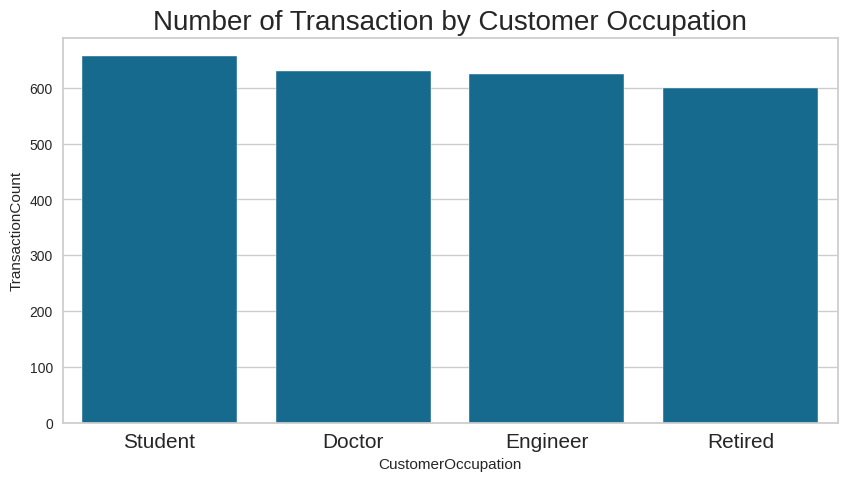

In [131]:
# Melihat demografi jumlah transaksi berdasarkan pekerjaan
byoccupation_df = bank_transactions_df.groupby(by="CustomerOccupation")["TransactionID"].nunique().reset_index()
byoccupation_df.rename(columns={
    "TransactionID": "TransactionCount"
}, inplace=True)

plt.figure(figsize=(10, 5))

sns.barplot(
    y="TransactionCount",
    x="CustomerOccupation",
    data=byoccupation_df.sort_values(by="TransactionCount", ascending=False)
)

plt.title("Number of Transaction by Customer Occupation", loc="center", fontsize=20)
plt.tick_params(axis="x", labelsize=15)

plt.show()

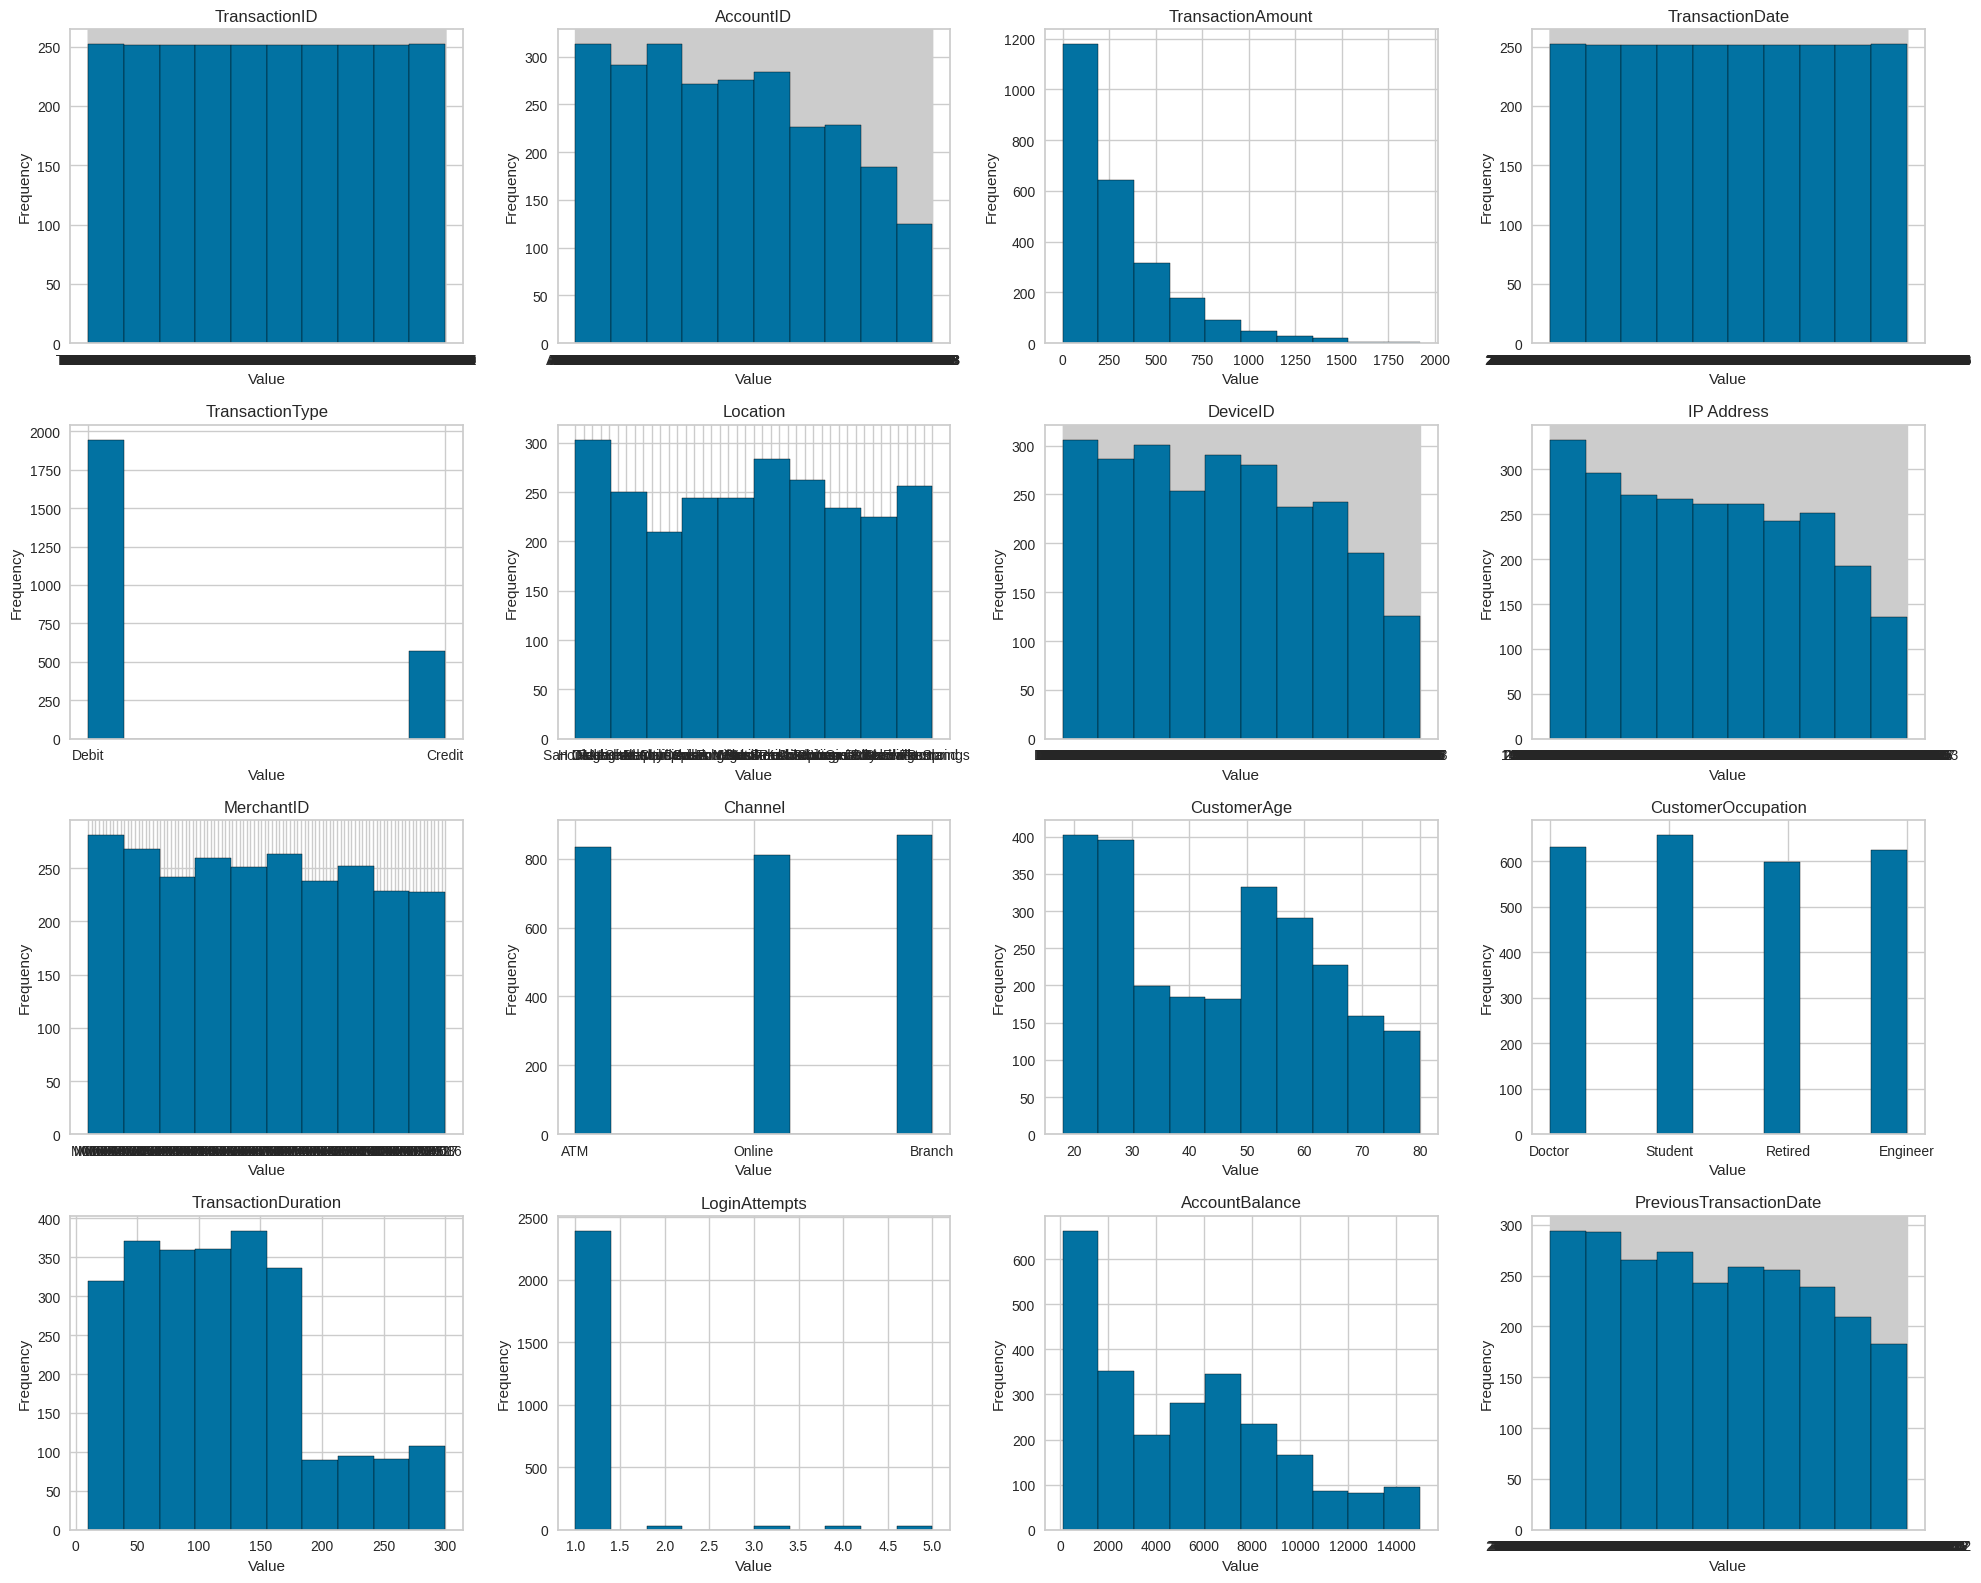

In [132]:
# Menghitung jumlah variabel
num_vars = bank_transactions_df.shape[1]

# Menentukan jumlah baris dan kolom untuk grid subplot
n_cols = 4  # Jumlah kolom yang diinginkan
n_rows = -(-num_vars // n_cols)  # Ceiling division untuk menentukan jumlah baris

# Membuat subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))

# Flatten axes array untuk memudahkan iterasi jika diperlukan
axes = axes.flatten()

# Plot setiap variabel
for i, column in enumerate(bank_transactions_df.columns):
    bank_transactions_df[column].hist(ax=axes[i], bins=10, edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Menghapus subplot yang tidak terpakai jika ada
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Menyesuaikan layout agar lebih rapi
plt.tight_layout()
plt.show()

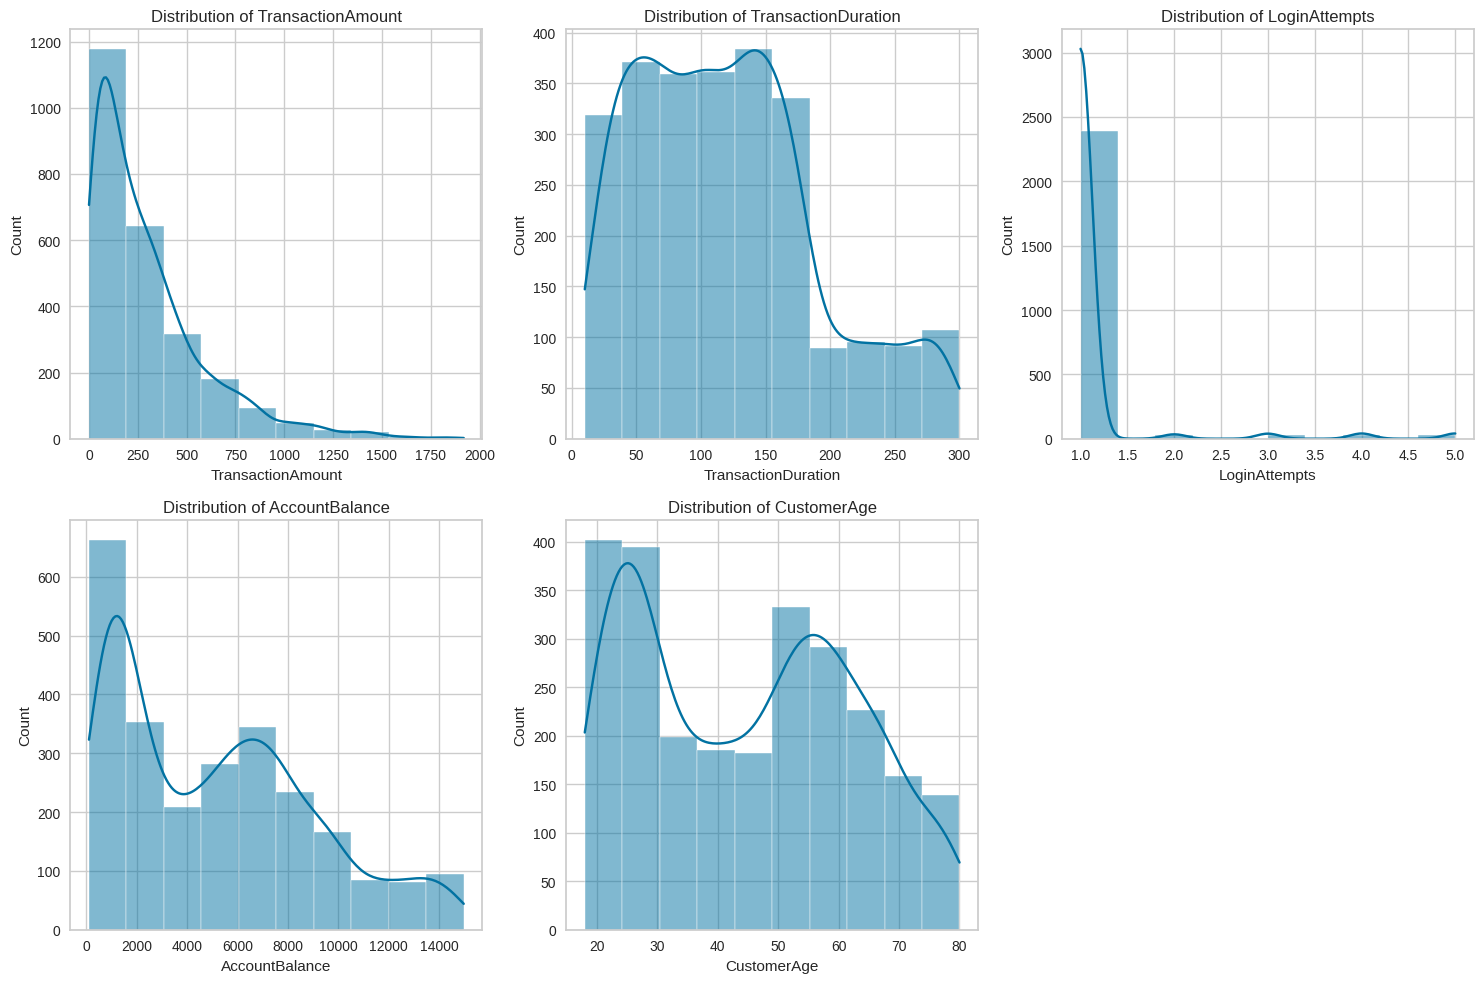

In [133]:
# Visualisasi distribusi data untuk beberapa kolom
columns_to_plot = ['TransactionAmount', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'CustomerAge']


def plot_histogram(data, columns, title=None):
    plt.figure(figsize=(15, 10))

    for i, col in enumerate(columns, 1):
        plt.subplot(2, 3, i)
        sns.histplot(data[col], kde=True, bins=10)
        plt.title((title, f'Distribution of {col}')[title is None])

    plt.tight_layout()
    plt.show()


plot_histogram(bank_transactions_df, columns_to_plot)

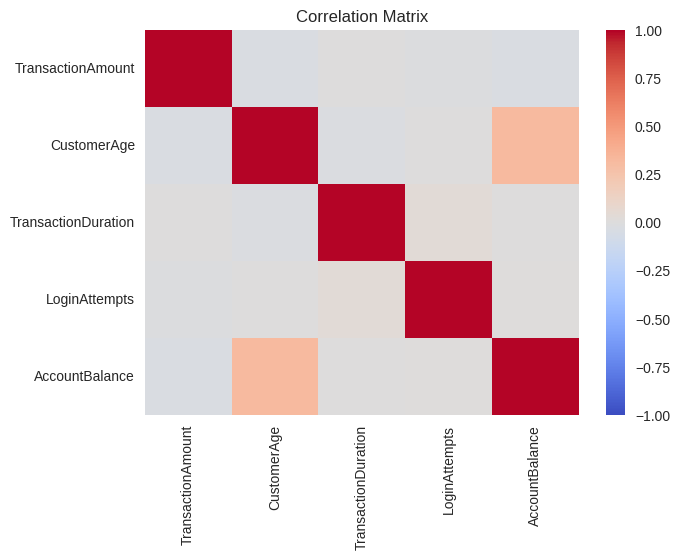

In [134]:
# Visualisasi korelasi antar variabel numerik
def show_corr_matrix(data):
    plt.figure(figsize=(7, 5))
    correlation_matrix = data.corr(numeric_only=True)

    sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Matrix')
    plt.show()


show_corr_matrix(bank_transactions_df)

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [135]:
# Mengecek apakah ada data kosong
bank_transactions_df.isna().sum()

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

In [136]:
# Mengecek apakah ada data yang duplikat
print("Jumlah data duplikat: ", bank_transactions_df.duplicated().sum())

Jumlah data duplikat:  0


In [137]:
# Memerika tipe data dan jumlah data pada dataset
bank_transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [138]:
# Mengubah tipe data pada kolom TransactionDate dan  PreviousTransactionDate menjadi datetime
datetime_columns = ['TransactionDate', 'PreviousTransactionDate']

for column in datetime_columns:
    bank_transactions_df[column] = pd.to_datetime(bank_transactions_df[column])

bank_transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionID            2512 non-null   object        
 1   AccountID                2512 non-null   object        
 2   TransactionAmount        2512 non-null   float64       
 3   TransactionDate          2512 non-null   datetime64[ns]
 4   TransactionType          2512 non-null   object        
 5   Location                 2512 non-null   object        
 6   DeviceID                 2512 non-null   object        
 7   IP Address               2512 non-null   object        
 8   MerchantID               2512 non-null   object        
 9   Channel                  2512 non-null   object        
 10  CustomerAge              2512 non-null   int64         
 11  CustomerOccupation       2512 non-null   object        
 12  TransactionDuration      2512 non-

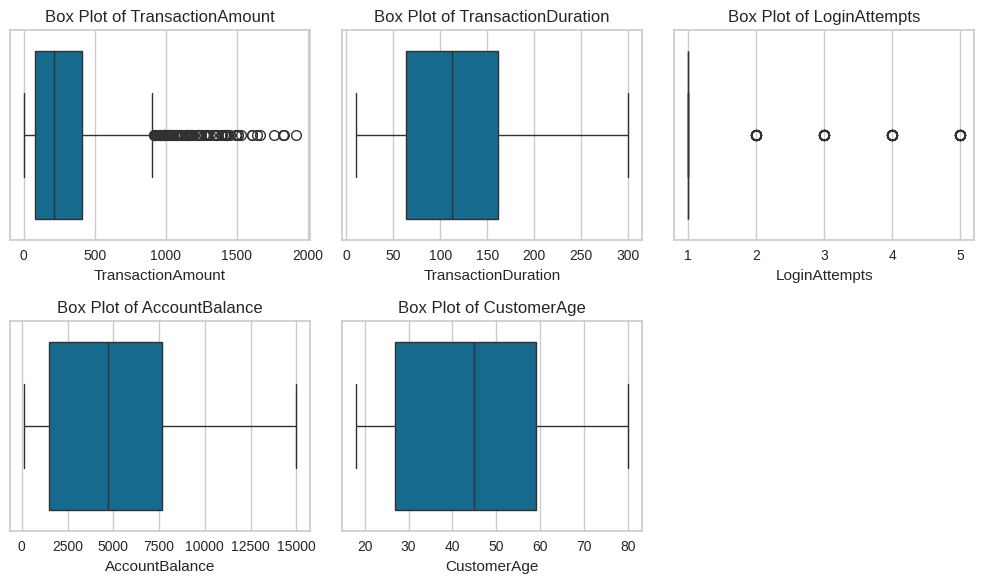

In [139]:
# Mengecek outliers pada data
numeric_features = ['TransactionAmount', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'CustomerAge']

plt.figure(figsize=(10, 6))

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=bank_transactions_df[feature])
    plt.title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()

In [140]:
# Memeriksa data kategorikal
category_features = bank_transactions_df.select_dtypes(include=['object']).columns

category_features

Index(['TransactionID', 'AccountID', 'TransactionType', 'Location', 'DeviceID',
       'IP Address', 'MerchantID', 'Channel', 'CustomerOccupation'],
      dtype='object')

In [141]:
# Membuat dataframe baru
bank_transactions_df_lencoder = pd.DataFrame(bank_transactions_df)

# Tempat penyimpanan label encoder, karena satu encoder untuk satu feature
label_encoders = {}

# Daftar feature yang akan dilakukan label encoding
categories = ['Channel', 'CustomerOccupation', 'Location']

# Melakukan perulangan untuk proses encoding
for _, category in enumerate(categories):
    # Inisialisasi LabelEncoder
    label_encoder = LabelEncoder()

    # Melakukan proses transformasi
    bank_transactions_df_lencoder[category] = label_encoder.fit_transform(bank_transactions_df_lencoder[category])

    # Menyimpan encoder ke dalam dictionary
    label_encoders[category] = label_encoder

bank_transactions_df_lencoder

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,36,D000380,162.198.218.92,M015,0,70,0,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,15,D000051,13.149.61.4,M052,0,68,0,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,23,D000235,215.97.143.157,M009,2,19,3,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,33,D000187,200.13.225.150,M002,2,26,3,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,1,D000308,65.164.3.100,M091,2,26,3,198,1,7429.40,2024-11-04 08:06:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,TX002508,AC00297,856.21,2023-04-26 17:09:36,Credit,7,D000625,21.157.41.17,M072,1,33,0,109,1,12690.79,2024-11-04 08:11:29
2508,TX002509,AC00322,251.54,2023-03-22 17:36:48,Debit,40,D000410,49.174.157.140,M029,1,48,0,177,1,254.75,2024-11-04 08:11:42
2509,TX002510,AC00095,28.63,2023-08-21 17:08:50,Debit,36,D000095,58.1.27.124,M087,1,56,2,146,1,3382.91,2024-11-04 08:08:39
2510,TX002511,AC00118,185.97,2023-02-24 16:24:46,Debit,10,D000634,21.190.11.223,M041,2,23,3,19,1,1776.91,2024-11-04 08:12:22


In [142]:
# Inisialisasi encoder One Hot
one_hot_encoder = OneHotEncoder(sparse_output=False)

# Melakukan encoding pada feature TransactionType
one_hot_encoded = one_hot_encoder.fit_transform(bank_transactions_df_lencoder[['TransactionType']])

# Mengkoversi hasil enconding menjadi datframe
one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(['TransactionType']))

# Menggabungkan dataframe hasil one hot dengan dataframe hasil label encoder
bank_transactions_df_one_hot = pd.concat([bank_transactions_df_lencoder, one_hot_df], axis=1)

# Menghapus fitur TransactionType
bank_transactions_df_one_hot.drop(columns=['TransactionType'], inplace=True)

bank_transactions_df_one_hot

,TransactionID,AccountID,TransactionAmount,TransactionDate,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionType_Credit,TransactionType_Debit
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,36,D000380,162.198.218.92,M015,0,70,0,81,1,5112.21,2024-11-04 08:08:08,0.0,1.0
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,15,D000051,13.149.61.4,M052,0,68,0,141,1,13758.91,2024-11-04 08:09:35,0.0,1.0
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,23,D000235,215.97.143.157,M009,2,19,3,56,1,1122.35,2024-11-04 08:07:04,0.0,1.0
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,33,D000187,200.13.225.150,M002,2,26,3,25,1,8569.06,2024-11-04 08:09:06,0.0,1.0
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,1,D000308,65.164.3.100,M091,2,26,3,198,1,7429.40,2024-11-04 08:06:39,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,TX002508,AC00297,856.21,2023-04-26 17:09:36,7,D000625,21.157.41.17,M072,1,33,0,109,1,12690.79,2024-11-04 08:11:29,1.0,0.0
2508,TX002509,AC00322,251.54,2023-03-22 17:36:48,40,D000410,49.174.157.140,M029,1,48,0,177,1,254.75,2024-11-04 08:11:42,0.0,1.0
2509,TX002510,AC00095,28.63,2023-08-21 17:08:50,36,D000095,58.1.27.124,M087,1,56,2,146,1,3382.91,2024-11-04 08:08:39,0.0,1.0
2510,TX002511,AC00118,185.97,2023-02-24 16:24:46,10,D000634,21.190.11.223,M041,2,23,3,19,1,1776.91,2024-11-04 08:12:22,0.0,1.0


In [143]:
# Standardisasi fitur numerik
scaler = MinMaxScaler()

# Menggabungkan array fitur numerik dan kategorikal
std_features = numeric_features + ['Channel', 'CustomerOccupation', 'Location']

bank_transactions_df_std = pd.DataFrame(bank_transactions_df_one_hot)

bank_transactions_df_std[std_features] = scaler.fit_transform(bank_transactions_df_one_hot[std_features])

bank_transactions_df_std

,TransactionID,AccountID,TransactionAmount,TransactionDate,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionType_Credit,TransactionType_Debit
0,TX000001,AC00128,0.007207,2023-04-11 16:29:14,0.857143,D000380,162.198.218.92,M015,0.0,0.838710,0.000000,0.244828,0.0,0.336832,2024-11-04 08:08:08,0.0,1.0
1,TX000002,AC00455,0.195940,2023-06-27 16:44:19,0.357143,D000051,13.149.61.4,M052,0.0,0.806452,0.000000,0.451724,0.0,0.918055,2024-11-04 08:09:35,0.0,1.0
2,TX000003,AC00019,0.065680,2023-07-10 18:16:08,0.547619,D000235,215.97.143.157,M009,1.0,0.016129,1.000000,0.158621,0.0,0.068637,2024-11-04 08:07:04,0.0,1.0
3,TX000004,AC00070,0.096016,2023-05-05 16:32:11,0.785714,D000187,200.13.225.150,M002,1.0,0.129032,1.000000,0.051724,0.0,0.569198,2024-11-04 08:09:06,0.0,1.0
4,TX000005,AC00411,0.006874,2023-10-16 17:51:24,0.023810,D000308,65.164.3.100,M091,1.0,0.129032,1.000000,0.648276,0.0,0.492591,2024-11-04 08:06:39,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,TX002508,AC00297,0.446074,2023-04-26 17:09:36,0.166667,D000625,21.157.41.17,M072,0.5,0.241935,0.000000,0.341379,0.0,0.846257,2024-11-04 08:11:29,1.0,0.0
2508,TX002509,AC00322,0.130953,2023-03-22 17:36:48,0.952381,D000410,49.174.157.140,M029,0.5,0.483871,0.000000,0.575862,0.0,0.010318,2024-11-04 08:11:42,0.0,1.0
2509,TX002510,AC00095,0.014785,2023-08-21 17:08:50,0.857143,D000095,58.1.27.124,M087,0.5,0.612903,0.666667,0.468966,0.0,0.220590,2024-11-04 08:08:39,0.0,1.0
2510,TX002511,AC00118,0.096782,2023-02-24 16:24:46,0.238095,D000634,21.190.11.223,M041,1.0,0.080645,1.000000,0.031034,0.0,0.112636,2024-11-04 08:12:22,0.0,1.0


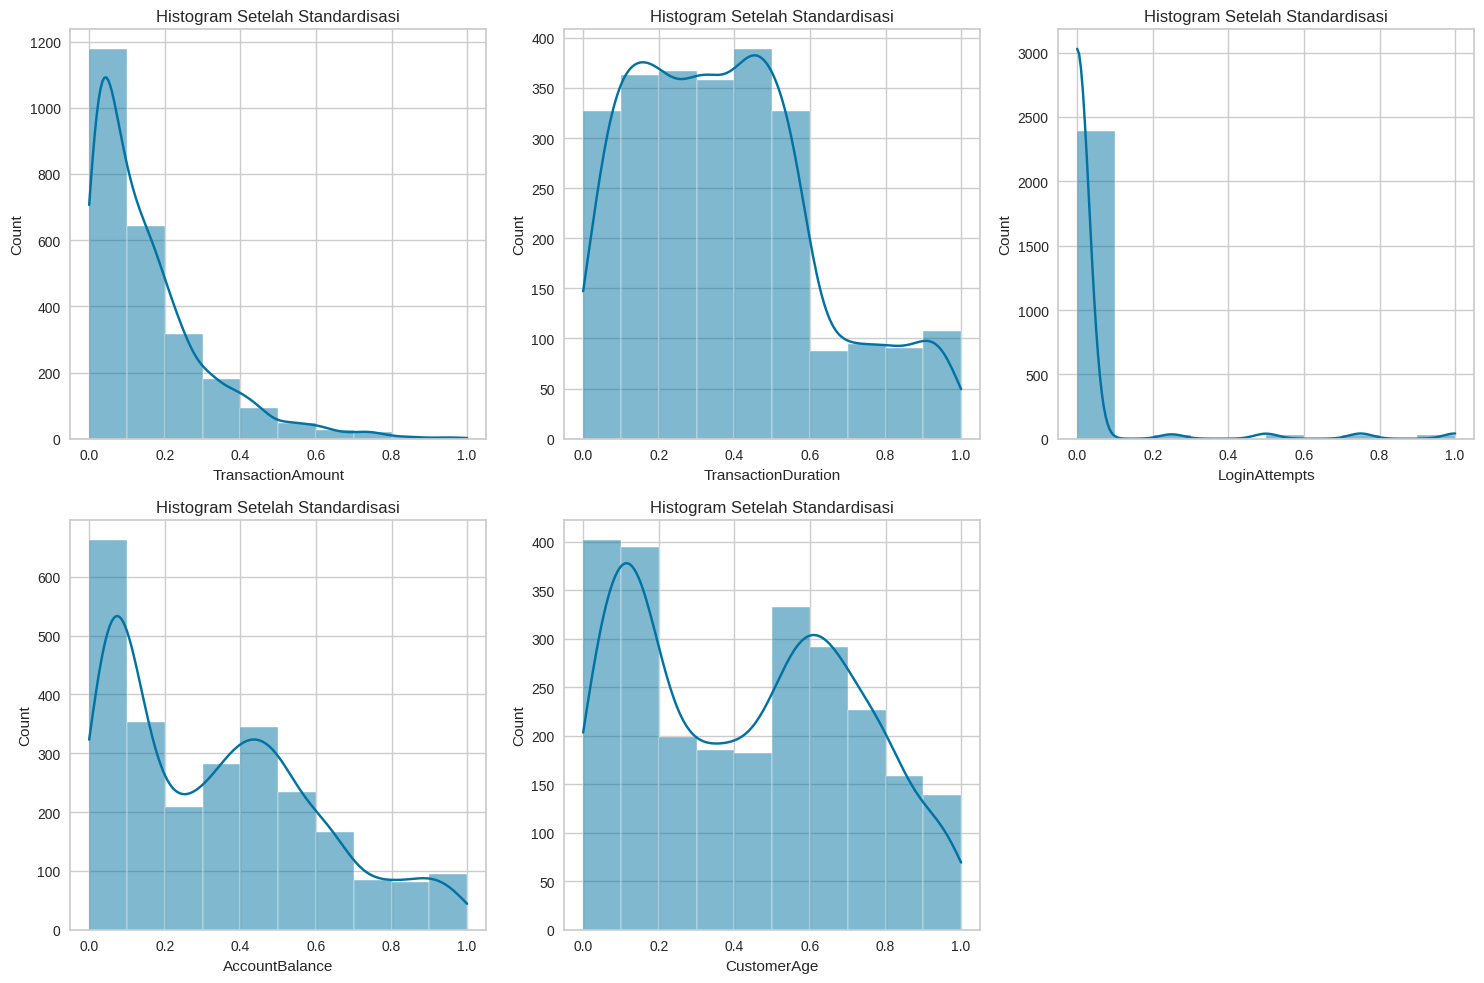

In [144]:
# Menampilkan histogram setelah dilakukan standardisasi
plot_histogram(bank_transactions_df_std, numeric_features, title='Histogram Setelah Standardisasi')

In [166]:
# Memisahkan fitur (X)
drop_columns = ["TransactionID", "AccountID", "DeviceID", "MerchantID", "TransactionDate", "PreviousTransactionDate",
                "IP Address", "Channel", "Location", "CustomerOccupation"]

bank_transactions_df_drop = bank_transactions_df_std.drop(columns=drop_columns)

# Mengambil kolom pada dataset
current_columns = bank_transactions_df_drop.columns

# Menyimpan dataset ke dalam bentuk array
X = bank_transactions_df_drop.iloc[:].values

print(pd.DataFrame(X, columns=current_columns))

      TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
0              0.007207     0.838710             0.244828            0.0   
1              0.195940     0.806452             0.451724            0.0   
2              0.065680     0.016129             0.158621            0.0   
3              0.096016     0.129032             0.051724            0.0   
4              0.006874     0.129032             0.648276            0.0   
...                 ...          ...                  ...            ...   
2507           0.446074     0.241935             0.341379            0.0   
2508           0.130953     0.483871             0.575862            0.0   
2509           0.014785     0.612903             0.468966            0.0   
2510           0.096782     0.080645             0.031034            0.0   
2511           0.126545     0.096774             0.286207            0.0   

      AccountBalance  TransactionType_Credit  TransactionType_Debit  
0           0.336

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [167]:
def k_means_clustering(n_clusters, random_state):
    # Inisialisasi dan melatih model KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    kmeans.fit(X)

    # Mendapatkan label cluster
    return kmeans.labels_


# Fungsi untuk analisis karakteristik cluster
def analyze_cluster(data, classes, number_of_cluster, current_cols):
    print("Analisis Karakteristik Setiap Cluster:")

    for cluster_id in range(number_of_cluster):
        # Mengambil data untuk cluster saat ini
        cluster_data = data[classes == cluster_id]

        print(f"\nCluster {cluster_id + 1}:")

        # Menghitung rata-rata untuk setiap fitur dalam cluster
        for index, col in enumerate(current_cols):
            print(f"Rata-rata {col}: {cluster_data[:, index].mean():.2f}")


# Mendapatkan label cluster
labels = k_means_clustering(2, 42)

# Analisis karakteristik setiap cluster
analyze_cluster(X, labels, 2, current_columns)

Analisis Karakteristik Setiap Cluster:

Cluster 1:
Rata-rata TransactionAmount: 0.15
Rata-rata CustomerAge: 0.42
Rata-rata TransactionDuration: 0.38
Rata-rata LoginAttempts: 0.03
Rata-rata AccountBalance: 0.33
Rata-rata TransactionType_Credit: 0.00
Rata-rata TransactionType_Debit: 1.00

Cluster 2:
Rata-rata TransactionAmount: 0.16
Rata-rata CustomerAge: 0.45
Rata-rata TransactionDuration: 0.38
Rata-rata LoginAttempts: 0.04
Rata-rata AccountBalance: 0.35
Rata-rata TransactionType_Credit: 1.00
Rata-rata TransactionType_Debit: 0.00


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

Silhouette Score: 0.58


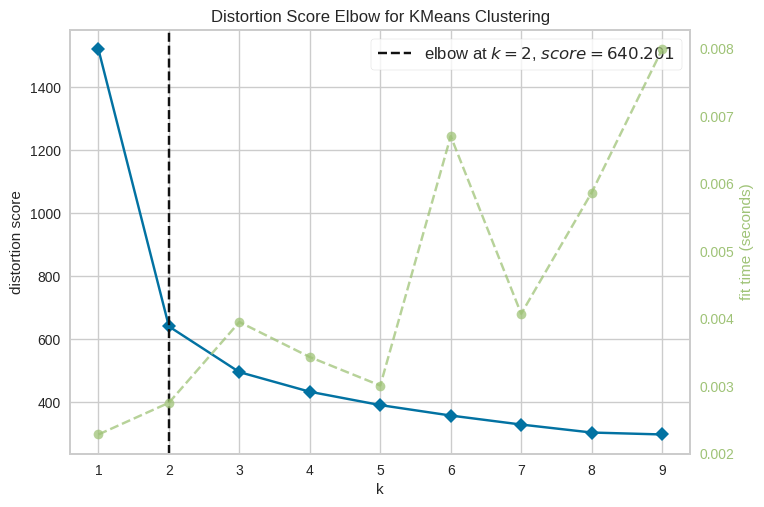

In [170]:
# Menghitung Silhouette Score
def calculate_silhouette_score(data):
    score = silhouette_score(data, labels)
    print(f"Silhouette Score: {score:.2f}")

calculate_silhouette_score(X)

def elbow_method(data, number_of_cluster):
    # Inisialisasi model KMeans tanpa parameter awal
    kmeans_method = KMeans()

    # Inisialisasi visualized KElbowVisualizer untuk menentukan jumlah cluster optimal
    visualizer = KElbowVisualizer(kmeans_method, k=number_of_cluster)

    # Fit visualized dengan data untuk menemukan jumlah cluster optimal
    visualizer.fit(data)

    # Menampilkan grafik elbow untuk analisis
    visualizer.show()


elbow_method(X, (1, 10))

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [169]:
# Menyimpan X dalam Dataframe
bank_transactions_df_feature = pd.DataFrame(X, columns=current_columns)

# 1. Mengecek variansi feature
bank_transactions_df_feature.var()

TransactionAmount         0.023149
CustomerAge               0.082352
TransactionDuration       0.058204
LoginAttempts             0.022700
AccountBalance            0.068758
TransactionType_Credit    0.175057
TransactionType_Debit     0.175057
dtype: float64

In [171]:
# 2. Mengecek korelasi antar feature
bank_transactions_df_feature.corr()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType_Credit,TransactionType_Debit
TransactionAmount,1.000000,-0.025616,0.004359,-0.008445,-0.025165,0.016495,-0.016495
CustomerAge,-0.025616,1.000000,-0.017936,0.007653,0.319942,0.044948,-0.044948
TransactionDuration,0.004359,-0.017936,1.000000,0.032639,0.005577,-0.001924,0.001924
LoginAttempts,-0.008445,0.007653,0.032639,1.000000,0.014999,0.017730,-0.017730
AccountBalance,-0.025165,0.319942,0.005577,0.014999,1.000000,0.018714,-0.018714
TransactionType_Credit,0.016495,0.044948,-0.001924,0.017730,0.018714,1.000000,-1.000000
TransactionType_Debit,-0.016495,-0.044948,0.001924,-0.017730,-0.018714,-1.000000,1.000000


In [172]:
# 3. Melakukan PCA (Principal Component Analysis)
pca = PCA(n_components=2)
fit_pca = pca.fit_transform(X)

bank_transactions_df_pca = pd.DataFrame(fit_pca)

X2 = bank_transactions_df_pca.iloc[:].values

---------------------------
Silhoutte Score sebelum PCA
---------------------------
Silhouette Score: 0.58

---------------------------
Silhoutte Score setelah PCA
---------------------------
Silhouette Score: 0.76


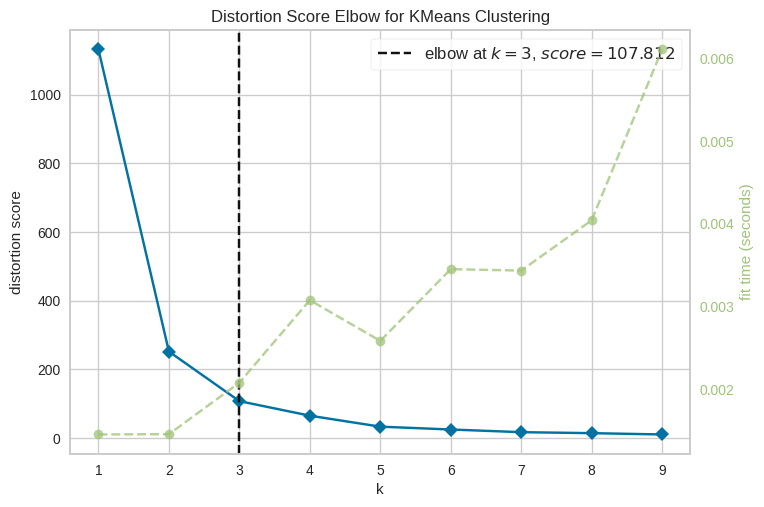

In [173]:
# Melakukan evaluasi setelah dilakukan PCA
print("---------------------------")
print("Silhoutte Score sebelum PCA")
print("---------------------------")
calculate_silhouette_score(X)

print("\n---------------------------")
print("Silhoutte Score setelah PCA")
print("---------------------------")
calculate_silhouette_score(X2)

# Menjalankan metode Elbow untuk menentukan jumlah clustering
elbow_method(X2, (1, 10))

In [174]:
# Melatih ulang model setelah dilakukan evaluasi
kmeans_2 = KMeans(n_clusters=3, random_state=42)
kmeans_2.fit(X2)

# Mendapatkan label cluster
labels = kmeans_2.labels_

# Mendapatkan jumlah cluster
k_2 = 3

# Melakukan analisis karakteristik cluster baru
analyze_cluster(X2, labels, k_2, bank_transactions_df_pca.columns)

Analisis Karakteristik Setiap Cluster:

Cluster 1:
Rata-rata 0: -0.31
Rata-rata 1: 0.22

Cluster 2:
Rata-rata 0: 1.09
Rata-rata 1: -0.01

Cluster 3:
Rata-rata 0: -0.33
Rata-rata 1: -0.34


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

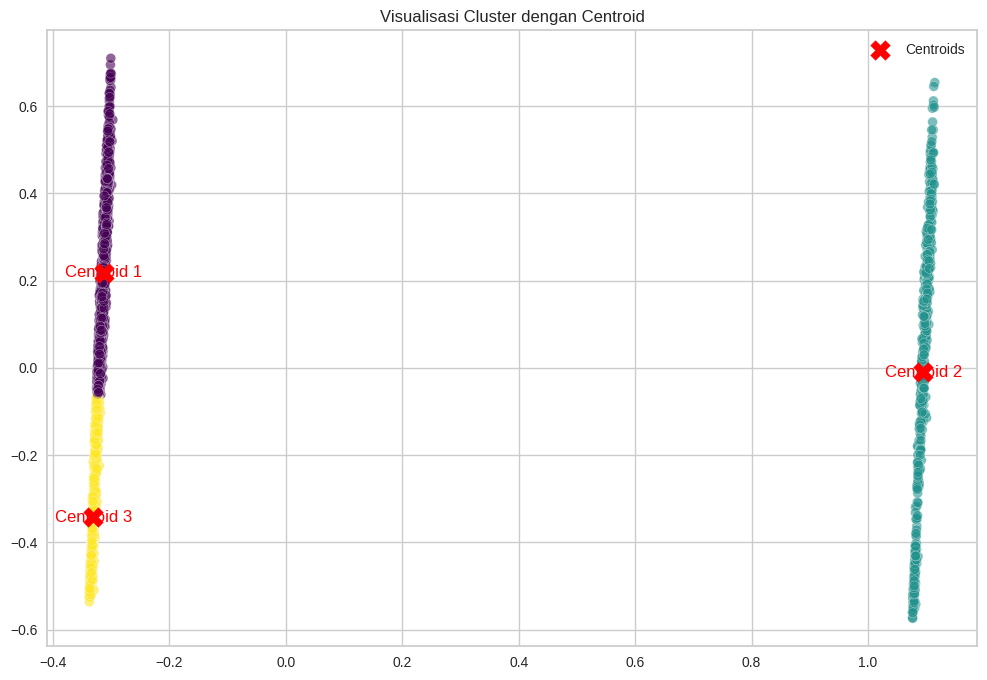

In [175]:
# Menentukan posisi centroid
centroids = kmeans_2.cluster_centers_

# Visualisasi cluster
plt.figure(figsize=(12, 8))

# Plot data
plt.scatter(X2[:, 0], X2[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')

# Plot centroid
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')

# Menambahkan label centroid pada plot
for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Centroid {i + 1}', color='red', fontsize=12, ha='center', va='center')

# Menambahkan judul dan label
plt.title('Visualisasi Cluster dengan Centroid')
plt.legend()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [176]:
# Melakukan inverse transformasi pada fitur yang dilakukan one hot encoding
one_hot_inverse = one_hot_encoder.inverse_transform(X2)

# Mengubah hasil inverse ke dalam bentuk DataFrame
one_hot_inverse_df = pd.DataFrame(one_hot_inverse, columns=['TransactionType'])

# Menggabungkan DataFrame hasil inverse dengan DataFrame sebelumnya
bank_transactions_df_last = pd.concat([bank_transactions_df_std, one_hot_inverse_df], axis=1)

# Melakukan drop pada fitur hasil one hot encoding
bank_transactions_df_last.drop(columns=['TransactionType_Credit', 'TransactionType_Debit'], inplace=True)

bank_transactions_df_last

,TransactionID,AccountID,TransactionAmount,TransactionDate,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionType
0,TX000001,AC00128,0.007207,2023-04-11 16:29:14,0.857143,D000380,162.198.218.92,M015,0.0,0.838710,0.000000,0.244828,0.0,0.336832,2024-11-04 08:08:08,Debit
1,TX000002,AC00455,0.195940,2023-06-27 16:44:19,0.357143,D000051,13.149.61.4,M052,0.0,0.806452,0.000000,0.451724,0.0,0.918055,2024-11-04 08:09:35,Debit
2,TX000003,AC00019,0.065680,2023-07-10 18:16:08,0.547619,D000235,215.97.143.157,M009,1.0,0.016129,1.000000,0.158621,0.0,0.068637,2024-11-04 08:07:04,Credit
3,TX000004,AC00070,0.096016,2023-05-05 16:32:11,0.785714,D000187,200.13.225.150,M002,1.0,0.129032,1.000000,0.051724,0.0,0.569198,2024-11-04 08:09:06,Debit
4,TX000005,AC00411,0.006874,2023-10-16 17:51:24,0.023810,D000308,65.164.3.100,M091,1.0,0.129032,1.000000,0.648276,0.0,0.492591,2024-11-04 08:06:39,Credit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,TX002508,AC00297,0.446074,2023-04-26 17:09:36,0.166667,D000625,21.157.41.17,M072,0.5,0.241935,0.000000,0.341379,0.0,0.846257,2024-11-04 08:11:29,Credit
2508,TX002509,AC00322,0.130953,2023-03-22 17:36:48,0.952381,D000410,49.174.157.140,M029,0.5,0.483871,0.000000,0.575862,0.0,0.010318,2024-11-04 08:11:42,Debit
2509,TX002510,AC00095,0.014785,2023-08-21 17:08:50,0.857143,D000095,58.1.27.124,M087,0.5,0.612903,0.666667,0.468966,0.0,0.220590,2024-11-04 08:08:39,Debit
2510,TX002511,AC00118,0.096782,2023-02-24 16:24:46,0.238095,D000634,21.190.11.223,M041,1.0,0.080645,1.000000,0.031034,0.0,0.112636,2024-11-04 08:12:22,Credit


In [177]:
# Menambahkan hasil label cluster ke Dataframe
bank_transactions_df_last['Cluster'] = kmeans_2.labels_

bank_transactions_df_last

,TransactionID,AccountID,TransactionAmount,TransactionDate,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionType,Cluster
0,TX000001,AC00128,0.007207,2023-04-11 16:29:14,0.857143,D000380,162.198.218.92,M015,0.0,0.838710,0.000000,0.244828,0.0,0.336832,2024-11-04 08:08:08,Debit,0
1,TX000002,AC00455,0.195940,2023-06-27 16:44:19,0.357143,D000051,13.149.61.4,M052,0.0,0.806452,0.000000,0.451724,0.0,0.918055,2024-11-04 08:09:35,Debit,0
2,TX000003,AC00019,0.065680,2023-07-10 18:16:08,0.547619,D000235,215.97.143.157,M009,1.0,0.016129,1.000000,0.158621,0.0,0.068637,2024-11-04 08:07:04,Credit,2
3,TX000004,AC00070,0.096016,2023-05-05 16:32:11,0.785714,D000187,200.13.225.150,M002,1.0,0.129032,1.000000,0.051724,0.0,0.569198,2024-11-04 08:09:06,Debit,2
4,TX000005,AC00411,0.006874,2023-10-16 17:51:24,0.023810,D000308,65.164.3.100,M091,1.0,0.129032,1.000000,0.648276,0.0,0.492591,2024-11-04 08:06:39,Credit,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,TX002508,AC00297,0.446074,2023-04-26 17:09:36,0.166667,D000625,21.157.41.17,M072,0.5,0.241935,0.000000,0.341379,0.0,0.846257,2024-11-04 08:11:29,Credit,1
2508,TX002509,AC00322,0.130953,2023-03-22 17:36:48,0.952381,D000410,49.174.157.140,M029,0.5,0.483871,0.000000,0.575862,0.0,0.010318,2024-11-04 08:11:42,Debit,2
2509,TX002510,AC00095,0.014785,2023-08-21 17:08:50,0.857143,D000095,58.1.27.124,M087,0.5,0.612903,0.666667,0.468966,0.0,0.220590,2024-11-04 08:08:39,Debit,0
2510,TX002511,AC00118,0.096782,2023-02-24 16:24:46,0.238095,D000634,21.190.11.223,M041,1.0,0.080645,1.000000,0.031034,0.0,0.112636,2024-11-04 08:12:22,Credit,2


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [178]:
# Melakukan inverse transform pada feature numerik yang dilakukan scaling
bank_transactions_df_last[std_features] = scaler.inverse_transform(bank_transactions_df_last[std_features])

In [179]:
bank_transactions_df_last

,TransactionID,AccountID,TransactionAmount,TransactionDate,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionType,Cluster
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,36.0,D000380,162.198.218.92,M015,0.0,70.0,0.0,81.0,1.0,5112.21,2024-11-04 08:08:08,Debit,0
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,15.0,D000051,13.149.61.4,M052,0.0,68.0,0.0,141.0,1.0,13758.91,2024-11-04 08:09:35,Debit,0
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,23.0,D000235,215.97.143.157,M009,2.0,19.0,3.0,56.0,1.0,1122.35,2024-11-04 08:07:04,Credit,2
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,33.0,D000187,200.13.225.150,M002,2.0,26.0,3.0,25.0,1.0,8569.06,2024-11-04 08:09:06,Debit,2
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,1.0,D000308,65.164.3.100,M091,2.0,26.0,3.0,198.0,1.0,7429.40,2024-11-04 08:06:39,Credit,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,TX002508,AC00297,856.21,2023-04-26 17:09:36,7.0,D000625,21.157.41.17,M072,1.0,33.0,0.0,109.0,1.0,12690.79,2024-11-04 08:11:29,Credit,1
2508,TX002509,AC00322,251.54,2023-03-22 17:36:48,40.0,D000410,49.174.157.140,M029,1.0,48.0,0.0,177.0,1.0,254.75,2024-11-04 08:11:42,Debit,2
2509,TX002510,AC00095,28.63,2023-08-21 17:08:50,36.0,D000095,58.1.27.124,M087,1.0,56.0,2.0,146.0,1.0,3382.91,2024-11-04 08:08:39,Debit,0
2510,TX002511,AC00118,185.97,2023-02-24 16:24:46,10.0,D000634,21.190.11.223,M041,2.0,23.0,3.0,19.0,1.0,1776.91,2024-11-04 08:12:22,Credit,2


In [185]:
# Melakukan inverse transfrom pada feature Location
bank_transactions_df_last['Location'] = label_encoders['Location'].inverse_transform(
    bank_transactions_df_lencoder['Location'])
bank_transactions_df_last

,TransactionID,AccountID,TransactionAmount,TransactionDate,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionType,Cluster
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08,Debit,0
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35,Debit,0
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04,Credit,2
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06,Debit,2
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Atlanta,D000308,65.164.3.100,M091,Online,26.0,Student,198.0,1.0,7429.40,2024-11-04 08:06:39,Credit,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,TX002508,AC00297,856.21,2023-04-26 17:09:36,Colorado Springs,D000625,21.157.41.17,M072,Branch,33.0,Doctor,109.0,1.0,12690.79,2024-11-04 08:11:29,Credit,1
2508,TX002509,AC00322,251.54,2023-03-22 17:36:48,Tucson,D000410,49.174.157.140,M029,Branch,48.0,Doctor,177.0,1.0,254.75,2024-11-04 08:11:42,Debit,2
2509,TX002510,AC00095,28.63,2023-08-21 17:08:50,San Diego,D000095,58.1.27.124,M087,Branch,56.0,Retired,146.0,1.0,3382.91,2024-11-04 08:08:39,Debit,0
2510,TX002511,AC00118,185.97,2023-02-24 16:24:46,Denver,D000634,21.190.11.223,M041,Online,23.0,Student,19.0,1.0,1776.91,2024-11-04 08:12:22,Credit,2


In [184]:
# Melakukan invers transform pada feature channel
bank_transactions_df_last['Channel'] = label_encoders['Channel'].inverse_transform(
    bank_transactions_df_lencoder['Channel'])
bank_transactions_df_last

,TransactionID,AccountID,TransactionAmount,TransactionDate,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionType,Cluster
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08,Debit,0
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35,Debit,0
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04,Credit,2
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06,Debit,2
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Atlanta,D000308,65.164.3.100,M091,Online,26.0,Student,198.0,1.0,7429.40,2024-11-04 08:06:39,Credit,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,TX002508,AC00297,856.21,2023-04-26 17:09:36,Colorado Springs,D000625,21.157.41.17,M072,Branch,33.0,Doctor,109.0,1.0,12690.79,2024-11-04 08:11:29,Credit,1
2508,TX002509,AC00322,251.54,2023-03-22 17:36:48,Tucson,D000410,49.174.157.140,M029,Branch,48.0,Doctor,177.0,1.0,254.75,2024-11-04 08:11:42,Debit,2
2509,TX002510,AC00095,28.63,2023-08-21 17:08:50,San Diego,D000095,58.1.27.124,M087,Branch,56.0,Retired,146.0,1.0,3382.91,2024-11-04 08:08:39,Debit,0
2510,TX002511,AC00118,185.97,2023-02-24 16:24:46,Denver,D000634,21.190.11.223,M041,Online,23.0,Student,19.0,1.0,1776.91,2024-11-04 08:12:22,Credit,2


In [186]:
# Melakukan invers transform pada feature CustomerOccupation
bank_transactions_df_last['CustomerOccupation'] = label_encoders['CustomerOccupation'].inverse_transform(
    bank_transactions_df_lencoder['CustomerOccupation'])
bank_transactions_df_last

,TransactionID,AccountID,TransactionAmount,TransactionDate,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionType,Cluster
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08,Debit,0
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35,Debit,0
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04,Credit,2
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06,Debit,2
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Atlanta,D000308,65.164.3.100,M091,Online,26.0,Student,198.0,1.0,7429.40,2024-11-04 08:06:39,Credit,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,TX002508,AC00297,856.21,2023-04-26 17:09:36,Colorado Springs,D000625,21.157.41.17,M072,Branch,33.0,Doctor,109.0,1.0,12690.79,2024-11-04 08:11:29,Credit,1
2508,TX002509,AC00322,251.54,2023-03-22 17:36:48,Tucson,D000410,49.174.157.140,M029,Branch,48.0,Doctor,177.0,1.0,254.75,2024-11-04 08:11:42,Debit,2
2509,TX002510,AC00095,28.63,2023-08-21 17:08:50,San Diego,D000095,58.1.27.124,M087,Branch,56.0,Retired,146.0,1.0,3382.91,2024-11-04 08:08:39,Debit,0
2510,TX002511,AC00118,185.97,2023-02-24 16:24:46,Denver,D000634,21.190.11.223,M041,Online,23.0,Student,19.0,1.0,1776.91,2024-11-04 08:12:22,Credit,2


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [211]:
# Distribusi nilai masing-masing cluster
bank_transactions_df_last.groupby(by="Cluster").agg({
    "TransactionAmount": ["min", "max", "mean"],
    "CustomerAge": ["min", "max", "mean"],
    "TransactionType": lambda x: x.mode(),
    "TransactionDuration": ["min", "max", "mean"],
    "LoginAttempts": ["min", "max", "mean"],
    "AccountBalance": ["min", "max", "mean"],
})

TransactionAmount                      CustomerAge                   \
                      min      max        mean         min   max       mean   
Cluster                                                                       
0                    0.32  1919.11  285.485596        26.0  80.0  55.321309   
1                    2.03  1831.02  306.501004        18.0  80.0  46.153169   
2                    0.26  1762.28  310.058737        18.0  53.0  26.679521   

        TransactionType TransactionDuration                    LoginAttempts  \
               <lambda>                 min    max        mean           min   
Cluster                                                                        
0                 Debit                10.0  300.0  119.720638           1.0   
1                Credit                10.0  294.0  119.394366           1.0   
2                Credit                11.0  300.0  119.708777           1.0   

                       AccountBalance                         
         max      mean            min       max         mean  
Cluster                                                       
0        5.0  1.119966         120.89  14977.99  6898.694077  
1        5.0  1.144366         105.01  14935.50  5249.332799  
2        5.0  1.117021         101.25   9963.39  2183.862606

Tulis hasil interpretasinya di sini.
## Cluster 1:
- **TransactionAmount**
    - **Rata-rata TransactionAmount:** 285.485596
    - **Batas minimum TransactionAmount:** 0.32
    - **Batas maximum TransactionAmount:** 1919.11
- **CustomerAge**
    - **Rata-rata CustomerAge (tahun):** 55.321309
    - **Batas minimum CustomerAge (tahun):** 26
    - **Batas maximum CustomerAge (tahun):** 80
- **TransactionType**
    - Memiliki nilai modus kategori Debit
- **TransactionDuration**
    - **Rata-rata TransactionAmount (sec):** 119.720638
    - **Batas minimum TransactionAmount (sec):** 10.0
    - **Batas maximum TransactionAmount (sec):** 300.0
- **LoginAttempts**
    - **Rata-rata LoginAttempts:** 1.119966
    - **Batas minimum LoginAttempts:** 1
    - **Batas maximum LoginAttempts:** 5
- **AccountBalance**
    - **Rata-rata AccountBalance:** 6898.694077
    - **Batas minimum AccountBalance:** 120.89
    - **Batas maximum AccountBalance:** 14977.99
- **Analisis:** Cluster ini menunjukkan jumlah sekali transaksi yang cukup banyak dengan rata - rata umur nasabah yang sudah tua. Kemudian, untuk transaksi biasanya menggunakan debit. Nasabah biasanya menghabiskan waktu selama 2 menit dalam sekali transaksi dan percobaan login hanya sekali saja. Jumlah saldo nasabah pada clutser ini cukup besar, menunjukkan bahwa orang dengan umur yang sudah tua lebih cenderung untuk menabung uang
## Cluster 2:
- **TransactionAmount**
    - **Rata-rata TransactionAmount:** 306.501004
    - **Batas minimum TransactionAmount:** 2.03
    - **Batas maximum TransactionAmount:** 1831.02
- **CustomerAge**
    - **Rata-rata CustomerAge (tahun):** 46.153169
    - **Batas minimum CustomerAge (tahun):** 18
    - **Batas maximum CustomerAge (tahun):** 80
- **TransactionType**
    - Memiliki nilai modus kategori Credit
- **TransactionDuration**
    - **Rata-rata TransactionDuration (sec):** 119.394366
    - **Batas minimum TransactionDuration (sec):** 10.0
    - **Batas maximum TransactionDuration (sec):** 294.0
- **LoginAttempts**
    - **Rata-rata LoginAttempts:** 1.144366
    - **Batas minimum LoginAttempts:** 1
    - **Batas maximum LoginAttempts:** 5
- **AccountBalance**
    - **Rata-rata AccountBalance:** 5249.332799
    - **Batas minimum AccountBalance:** 105.01
    - **Batas maximum AccountBalance:** 14935.50
- **Analisis:** Cluster ini menunjukkan jumlah sekali transasi yang cukup banyak dengan rata-rata umur nasabah yang sudah dewasa. Kemudian, untuk transaksi biasanya menggunakan kredit. Nasabah biasanya menghabiskan waktu selama 2 menit dalam sekali transaksi dan percobaan login hanya sekali saja. Jumlah saldo nasabah pada cluster ini cukup besar, menunjukkan bahwa orang dengan umur yang sudah dewasa cenderung untuk menabung uang
## Cluster 3:
- **TransactionAmount**
    - **Rata-rata TransactionAmount:** 310.058737
    - **Batas minimum TransactionAmount:** 0.26
    - **Batas maximum TransactionAmount:** 1762.28
- **CustomerAge**
    - **Rata-rata CustomerAge (tahun):** 26.679521
    - **Batas minimum CustomerAge (tahun):** 18
    - **Batas maximum CustomerAge (tahun):** 53
- **TransactionType**
    - Memiliki nilai modus kategori Credit
- **TransactionDuration**
    - **Rata-rata TransactionDuration (sec):** 119.708777
    - **Batas minimum TransactionDuration (sec):** 11.0
    - **Batas maximum TransactionDuration (sec):** 300.0
- **LoginAttempts**
    - **Rata-rata LoginAttempts:** 1.117021
    - **Batas minimum LoginAttempts:** 1
    - **Batas maximum LoginAttempts:** 5
- **AccountBalance**
    - **Rata-rata AccountBalance:** 2183.862606
    - **Batas minimum AccountBalance:** 101.25
    - **Batas maximum AccountBalance:** 9963.39
- **Analisis:** Cluster ini menunjukkan jumlah sekali transasi yang cukup banyak dengan rata-rata umur nasabah yang masih muda. Kemudian, untuk transaksi biasanya menggunakan kredit. Nasabah biasanya menghabiskan waktu selama 2 menit dalam sekali transasi dan percobaan login hanya sekali saja. Jumlah saldo nasabah pada cluster ini cukup sedikit, mengingat umur yang masih muda keinginan untuk berbelanja cukup tinggi

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [239]:
# Mendapatkan kolom pada dataframe terakhir
last_columns = bank_transactions_df_last.columns.to_list()

# Melakukan export data ke dalam file csv
bank_transactions_df_last.to_csv(path_or_buf="Dataset_clustering.csv", index=False, columns=last_columns)